In [33]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


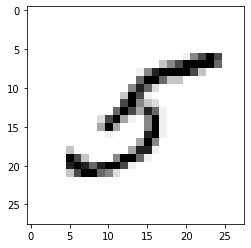

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [35]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [36]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


In [39]:
# save input image dimensions
img_rows, img_cols = 28, 28
import numpy as np

x_train = np.array(x_train.reshape(x_train.shape[0], img_rows, img_cols, 1),dtype=np.float64)
x_test = np.array(x_test.reshape(x_test.shape[0], img_rows, img_cols, 1),dtype=np.float64)

x_train /= 255
x_test /= 255

In [40]:
from keras.utils.np_utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [42]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [43]:
model.add(Dropout(0.25))

In [44]:
model.add(Flatten())

In [45]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [46]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 10
print(x_train.shape,y_train.shape)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

In [55]:
import imageio

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

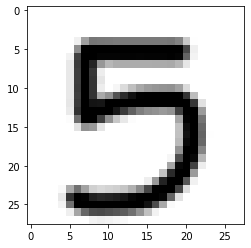

In [56]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [57]:
# reshape the image
gray = gray.reshape(1, img_rows, img_cols, 1)

# normalize image
gray /= 255

In [ ]:
# load the model
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())